In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''



##  Example: The Univariate Gaussian

We now illustrate the factorized variational approximation using a Gaussian distribution over a single variable $ x $ (MacKay, 2003). Our goal is to infer the posterior distribution for the mean $ \mu $ and precision $ \tau $, given a data set $ D = \{ x_1, \dots, x_N \} $ of observed values of $ x $, which are assumed to be drawn independently from the Gaussian. The likelihood function is given by:

$$
p(D | \mu, \tau) = \prod_{n=1}^N \left( \tau^{1/2} \exp \left( - \frac{\tau}{2} (x_n - \mu)^2 \right) \right)
$$

We now introduce conjugate prior distributions for $ \mu $ and $ \tau 4, given by:

$$
p(\mu | \tau) = \mathcal{N}(\mu | \mu_0, (\lambda_0 \tau)^{-1})
$$

$$
p(\tau) = \text{Gamma}(\tau | a_0, b_0)
$$

where $ \text{Gamma}(\tau | a_0, b_0) $ is the gamma distribution defined by:

$$
\text{Gamma}(\tau | a_0, b_0) = \frac{b_0^{a_0}}{\Gamma(a_0)} \tau^{a_0 - 1} \exp \left( - \frac{b_0}{\tau} \right)
$$

Together, these distributions constitute a Gaussian-Gamma conjugate prior distribution. For this simple problem, the posterior distribution can be found exactly and again takes the form of a Gaussian-Gamma distribution. However, for tutorial purposes, we will consider a factorized variational approximation to the posterior distribution given by:

$$
q(\mu, \tau) = q_\mu(\mu) q_\tau(\tau)
$$

Note that the true posterior distribution does not factorize in this way. The optimum factors $ q_\mu(\mu) $ and $ q_\tau(\tau) $ can be obtained from the general result (10.9) as follows.

### For $ q_\mu(\mu) $:

We have:

$$
\ln q_\mu(\mu) = \mathbb{E}_\tau \left[ \ln p(D | \mu, \tau) + \ln p(\mu | \tau) \right] + \text{const}
$$

$$
\ln q_\mu(\mu) = - \lambda_0 (\mu - \mu_0) + \sum_{n=1}^N \left( - \frac{\tau}{2} (x_n - \mu)^2 \right) + \text{const}
$$

Completing the square over $ \mu $, we see that $ q_\mu(\mu) $ is a Gaussian distribution $ \mathcal{N}(\mu | \mu_N, \lambda_N^{-1}) $ with:

$$
\mu_N = \frac{\lambda_0 \mu_0 + N \bar{x}}{\lambda_0 + N}
$$

$$
\lambda_N = \lambda_0 + N \mathbb{E}[\tau]
$$

Note that for $ N \to \infty $, this gives the maximum likelihood result in which $ \mu_N = \bar{x} $ (the sample mean) and the precision is infinite.

### For $ q_\tau(\tau) $:

The optimal solution for the factor $ q_\tau(\tau) $ is given by:

$$
\ln q_\tau(\tau) = \mathbb{E}_\mu \left[ \ln p(D | \mu, \tau) + \ln p(\mu | \tau) \right] + \ln p(\tau) + \text{const}
$$

$$
\ln q_\tau(\tau) = (a_0 - 1) \ln \tau - b_0 \tau + \sum_{n=1}^N \left( - \frac{1}{2} \mathbb{E}_\mu[(x_n - \mu)^2] + \frac{\lambda_0}{2} (\mu - \mu_0)^2 \right) + \text{const}
$$

Thus, \( q_\tau(\tau) \) is a Gamma distribution:

$$
q_\tau(\tau) = \text{Gamma}(\tau | a_N, b_N)
$$

with parameters:

$$
a_N = a_0 + \frac{N}{2}
$$

$$
b_N = b_0 + \frac{1}{2} \sum_{n=1}^N \mathbb{E}_\mu[(x_n - \mu)^2] + \frac{\lambda_0}{2} (\mu - \mu_0)^2
$$

Again, this exhibits the expected behavior when $ N \to \infty $. It should be emphasized that we did not assume these specific functional forms for the optimal distributions $ q_\mu(\mu) $ and $ q_\tau(\tau) $. They arose naturally from the structure of the likelihood function and the corresponding conjugate priors.

Thus, we have expressions for the optimal distributions $ q_\mu(\mu) $ and $ q_\tau(\tau) $, each of which depends on moments evaluated with respect to the other distribution. One approach to finding a solution is therefore to make an initial guess for, say, the moment $ \mathbb{E}[\tau] $, and use this to re-compute the distribution $ q_\mu(\mu) $. Given this revised distribution, we can then extract the required moments $ \mathbb{E}[\mu] $ and $ \mathbb{E}[\mu^2] $, and use these to recompute the distribution $ q_\tau(\tau) $, and so on.

Since the space of hidden variables for this example is only two-dimensional, we can illustrate the variational approximation to the posterior distribution by plotting contours of both the true posterior and the factorized approximation, as illustrated in Fig.4.

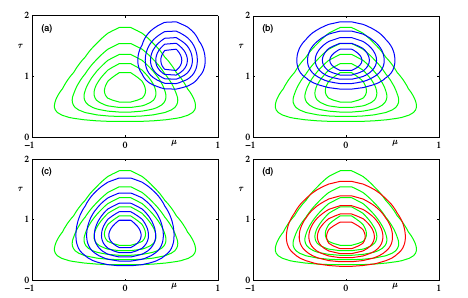

Fig.4 Illustration of variational inference for the mean µ and precision τ of a univariate Gaussian distribu- tion. Contours of the true posterior distribution p(µ, τ |D) are shown in green. (a) Contours of the initial factorized approximation qµ (µ)qτ (τ ) are shown in blue. (b) After re-estimating the factor qµ (µ). (c) After re-estimating the factor qτ (τ ). (d) Contours of the optimal factorized approximation, to which the iterative scheme converges, are shown in red.

In [1]:
import math

# Example data
N = 10  # Number of data points
x_data = [1.2, 1.5, 1.8, 2.0, 1.6, 1.3, 1.9, 2.1, 1.7, 1.4]  # Example observations of x

# Parameters for the priors
mu_0 = 0.0  # Prior mean for mu
lambda_0 = 1.0  # Prior precision for mu (inverse of variance)
a_0 = 2.0  # Shape parameter for gamma prior on tau
b_0 = 1.0  # Rate parameter for gamma prior on tau

# Initial guess for moments
E_tau = 1.0  # Initial guess for the expected precision tau

# Number of iterations for the variational update
iterations = 10

# Function to update the q_mu distribution
def update_q_mu(mu_0, lambda_0, x_data, E_tau):
    N = len(x_data)
    sum_x = sum(x_data)
    
    # Compute the mean and precision of q_mu
    mu_N = (lambda_0 * mu_0 + N * sum_x) / (lambda_0 + N)
    lambda_N = lambda_0 + N * E_tau
    return mu_N, lambda_N

# Function to update the q_tau distribution
def update_q_tau(x_data, mu_N, lambda_N, a_0, b_0):
    N = len(x_data)
    sum_square_diff = sum((x - mu_N) ** 2 for x in x_data)
    
    # Update the shape and rate parameters of q_tau
    a_N = a_0 + N / 2
    b_N = b_0 + (sum_square_diff / 2) + (lambda_N / 2) * (mu_N ** 2)
    
    return a_N, b_N

# Variational Inference iterations
for iteration in range(iterations):
    # Step 1: Update q_mu
    mu_N, lambda_N = update_q_mu(mu_0, lambda_0, x_data, E_tau)
    
    # Step 2: Update q_tau
    a_N, b_N = update_q_tau(x_data, mu_N, lambda_N, a_0, b_0)
    
    # Step 3: Update expected tau
    E_tau = a_N / b_N  # Expectation of the gamma distribution (mean of tau)
    
    # Print current iteration and updates
    print(f"Iteration {iteration + 1}:")
    print(f"  q_mu: mean = {mu_N}, precision = {lambda_N}")
    print(f"  q_tau: shape = {a_N}, rate = {b_N}, expected tau = {E_tau}")
    print()

# Final results after all iterations
print("Final Results:")
print(f"  Final q_mu: mean = {mu_N}, precision = {lambda_N}")
print(f"  Final q_tau: shape = {a_N}, rate = {b_N}, expected tau = {E_tau}")


Iteration 1:
  q_mu: mean = 15.0, precision = 11.0
  q_tau: shape = 7.0, rate = 2130.025, expected tau = 0.0032863464043849247

Iteration 2:
  q_mu: mean = 15.0, precision = 1.0328634640438492
  q_tau: shape = 7.0, rate = 1008.7221397049332, expected tau = 0.006939472947473531

Iteration 3:
  q_mu: mean = 15.0, precision = 1.0693947294747352
  q_tau: shape = 7.0, rate = 1012.8319070659078, expected tau = 0.006911314652673645

Iteration 4:
  q_mu: mean = 15.0, precision = 1.0691131465267365
  q_tau: shape = 7.0, rate = 1012.800228984258, expected tau = 0.006911530822835943

Iteration 5:
  q_mu: mean = 15.0, precision = 1.0691153082283593
  q_tau: shape = 7.0, rate = 1012.8004721756905, expected tau = 0.00691152916325429

Iteration 6:
  q_mu: mean = 15.0, precision = 1.0691152916325428
  q_tau: shape = 7.0, rate = 1012.8004703086611, expected tau = 0.0069115291759952275

Iteration 7:
  q_mu: mean = 15.0, precision = 1.0691152917599522
  q_tau: shape = 7.0, rate = 1012.8004703229947, expe

In general, we will need to use an iterative approach such as this in order to solve for the optimal factorized posterior distribution. For the very simple example we are considering here, however, we can find an explicit solution by solving the simultaneous equations for the optimal factors $ q_\mu(\mu) $ and $ q_\tau(\tau) $. Before doing this, we can simplify these expressions by considering broad, noninformative priors in which $ \mu_0 = a_0 = b_0 = \lambda_0 = 0 $. Although these parameter settings correspond to improper priors, we see that the posterior distribution is still well defined.

Using the standard result $ \mathbb{E}[\tau] = \frac{a_N}{b_N} $ for the mean of a Gamma distribution, together with equations (10.29) and (10.30), we have:

$$
\frac{1}{N} \sum_{n=1}^N (x_n - \mu)^2 = x^2 - 2x\mathbb{E}[\mu] + \mathbb{E}[\mu^2].
$$

Then, using equations (10.26) and (10.27), we obtain the first and second-order moments of $ q_\mu(\mu) $ in the form:

$$
\mathbb{E}[\mu] = x, \quad \mathbb{E}[\mu^2] = x^2 + \frac{1}{N} \mathbb{E}[\tau].
$$

We can now substitute these moments into the previous equation and solve for $ \mathbb{E}[\tau] $ to give:

$$
\mathbb{E}[\tau] = \frac{1}{N - 1} \sum_{n=1}^N (x_n - x)^2.
$$

We recognize the right-hand side as the familiar unbiased estimator for the variance of a univariate Gaussian distribution, and so we see that the use of a Bayesian approach has avoided the bias of the maximum likelihood solution.


In [2]:
import numpy as np

# Generate some synthetic data (for example, N=10 samples from a Gaussian with known parameters)
N = 10
true_mu = 5.0  # true mean of the Gaussian
true_tau = 2.0  # true precision (inverse of variance)
x = np.random.normal(true_mu, 1/np.sqrt(true_tau), N)  # observed data

# Initial guesses for the variational parameters (non-informative priors)
mu = 0.0
tau = 1.0

# Iteratively update the estimates of the posterior parameters
iterations = 100
for i in range(iterations):
    # Update the mean and second moment for q_mu(µ)
    E_tau = tau  # approximation for E[τ], which is the current value of tau
    
    # Compute the first and second moments of q_mu(µ)
    E_mu = np.mean(x)
    E_mu2 = np.mean(x**2) + 1/N * E_tau  # second moment of q_mu
    
    # Compute the new estimate for q_tau(τ)
    E_tau_new = (1 / (N - 1)) * np.sum((x - E_mu)**2)  # Unbiased estimator of the variance

    # Print the current iteration's results
    print(f"Iteration {i + 1}: E[µ] = {E_mu}, E[µ^2] = {E_mu2}, E[τ] = {E_tau_new}")
    
    # Update tau
    tau = E_tau_new

# Final values after all iterations
print(f"Final estimate of µ: {E_mu}")
print(f"Final estimate of τ: {tau}")


Iteration 1: E[µ] = 4.984900743434247, E[µ^2] = 25.19459475635699, E[τ] = 0.2726214827396577
Iteration 2: E[µ] = 4.984900743434247, E[µ^2] = 25.121856904630956, E[τ] = 0.2726214827396577
Iteration 3: E[µ] = 4.984900743434247, E[µ^2] = 25.121856904630956, E[τ] = 0.2726214827396577
Iteration 4: E[µ] = 4.984900743434247, E[µ^2] = 25.121856904630956, E[τ] = 0.2726214827396577
Iteration 5: E[µ] = 4.984900743434247, E[µ^2] = 25.121856904630956, E[τ] = 0.2726214827396577
Iteration 6: E[µ] = 4.984900743434247, E[µ^2] = 25.121856904630956, E[τ] = 0.2726214827396577
Iteration 7: E[µ] = 4.984900743434247, E[µ^2] = 25.121856904630956, E[τ] = 0.2726214827396577
Iteration 8: E[µ] = 4.984900743434247, E[µ^2] = 25.121856904630956, E[τ] = 0.2726214827396577
Iteration 9: E[µ] = 4.984900743434247, E[µ^2] = 25.121856904630956, E[τ] = 0.2726214827396577
Iteration 10: E[µ] = 4.984900743434247, E[µ^2] = 25.121856904630956, E[τ] = 0.2726214827396577
Iteration 11: E[µ] = 4.984900743434247, E[µ^2] = 25.12185690

In [3]:
import random

# Generate some synthetic data (for example, N=10 samples from a Gaussian with known parameters)
N = 10
true_mu = 5.0  # true mean of the Gaussian
true_tau = 2.0  # true precision (inverse of variance)

# Generate N samples using the formula for a Gaussian distribution
x = [random.gauss(true_mu, 1 / (true_tau ** 0.5)) for _ in range(N)]

# Initial guesses for the variational parameters (non-informative priors)
mu = 0.0
tau = 1.0

# Iteratively update the estimates of the posterior parameters
iterations = 100
for i in range(iterations):
    # Update the mean and second moment for q_mu(µ)
    E_tau = tau  # approximation for E[τ], which is the current value of tau
    
    # Compute the first and second moments of q_mu(µ)
    E_mu = sum(x) / N  # The mean of the data
    E_mu2 = sum([xi ** 2 for xi in x]) / N + 1 / N * E_tau  # Second moment of q_mu
    
    # Compute the new estimate for q_tau(τ)
    E_tau_new = sum([(xi - E_mu) ** 2 for xi in x]) / (N - 1)  # Unbiased estimator of the variance

    # Print the current iteration's results
    print(f"Iteration {i + 1}: E[µ] = {E_mu}, E[µ^2] = {E_mu2}, E[τ] = {E_tau_new}")
    
    # Update tau
    tau = E_tau_new

# Final values after all iterations
print(f"Final estimate of µ: {E_mu}")
print(f"Final estimate of τ: {tau}")


Iteration 1: E[µ] = 5.140173707094034, E[µ^2] = 26.70944474495039, E[τ] = 0.20895445094395607
Iteration 2: E[µ] = 5.140173707094034, E[µ^2] = 26.630340190044784, E[τ] = 0.20895445094395607
Iteration 3: E[µ] = 5.140173707094034, E[µ^2] = 26.630340190044784, E[τ] = 0.20895445094395607
Iteration 4: E[µ] = 5.140173707094034, E[µ^2] = 26.630340190044784, E[τ] = 0.20895445094395607
Iteration 5: E[µ] = 5.140173707094034, E[µ^2] = 26.630340190044784, E[τ] = 0.20895445094395607
Iteration 6: E[µ] = 5.140173707094034, E[µ^2] = 26.630340190044784, E[τ] = 0.20895445094395607
Iteration 7: E[µ] = 5.140173707094034, E[µ^2] = 26.630340190044784, E[τ] = 0.20895445094395607
Iteration 8: E[µ] = 5.140173707094034, E[µ^2] = 26.630340190044784, E[τ] = 0.20895445094395607
Iteration 9: E[µ] = 5.140173707094034, E[µ^2] = 26.630340190044784, E[τ] = 0.20895445094395607
Iteration 10: E[µ] = 5.140173707094034, E[µ^2] = 26.630340190044784, E[τ] = 0.20895445094395607
Iteration 11: E[µ] = 5.140173707094034, E[µ^2] = 2

###  Model Comparison

As well as performing inference over the hidden variables $ Z $, we may also wish to compare a set of candidate models, labelled by the index $ m $, and having prior probabilities $ p(m) $. Our goal is then to approximate the posterior probabilities $ p(m|X) $, where $ X $ is the observed data. This is a slightly more complex situation than that considered so far because different models may have different structure and indeed different dimensionality for the hidden variables $ Z $. We cannot therefore simply consider a factorized approximation $ q(Z)q(m) $, but must instead recognize that the posterior over $ Z $ must be conditioned on $ m $, and so we must consider $ q(Z, m) = q(Z|m)q(m) $.

We can readily verify the following decomposition based on this variational distribution:

$$
\ln p(X) = \sum_m \int p(Z, m|X) \ln \frac{p(Z, m, X)}{q(Z|m)q(m)} dZ
$$

where the $ L_m $ is a lower bound on $ \ln p(X) $ and is given by:

$$
L_m = \int q(Z|m)q(m) \ln \frac{p(Z, X, m)}{q(Z|m)q(m)} dZ
$$

Here we are assuming discrete $ Z $, but the same analysis applies to continuous latent variables provided the summations are replaced with integrations. We can maximize $ L_m $ with respect to the distribution $ q(m) $ using a Lagrange multiplier, with the result:

$$
q(m) \propto p(m) \exp \{L_m\}
$$

However, if we maximize $ L_m $ with respect to the $ q(Z|m) $, we find that the solutions for different $ m $ are coupled, as we expect because they are conditioned on $ m $. We proceed instead by first optimizing each of the $ q(Z|m) $ individually by optimization of $ L_m $, and then subsequently determining $ q(m) $ using the equation above. After normalization, the resulting values for $ q(m) $ can be used for model selection or model averaging in the usual way.


###  Model Comparison

As well as performing inference over the hidden variables $ Z $, we may also wish to compare a set of candidate models, labelled by the index $ m $, and having prior probabilities $ p(m) $. Our goal is then to approximate the posterior probabilities $ p(m|X) $, where $ X $ is the observed data. This is a slightly more complex situation than that considered so far because different models may have different structure and indeed different dimensionality for the hidden variables $ Z $. We cannot therefore simply consider a factorized approximation $ q(Z)q(m) $, but must instead recognize that the posterior over $ Z $ must be conditioned on $ m$, and so we must consider $ q(Z, m) = q(Z|m)q(m) $.

We can readily verify the following decomposition based on this variational distribution:

$$
\ln p(X) = \sum_m \int p(Z, m|X) \ln \frac{p(Z, m, X)}{q(Z|m)q(m)} dZ
$$

where the $ L_m $ is a lower bound on $ \ln p(X) $ and is given by:

$$
L_m = \int q(Z|m)q(m) \ln \frac{p(Z, X, m)}{q(Z|m)q(m)} dZ
$$

Here we are assuming discrete $ Z $, but the same analysis applies to continuous latent variables provided the summations are replaced with integrations. We can maximize $ L_m $ with respect to the distribution $ q(m) $ using a Lagrange multiplier, with the result:

$$
q(m) \propto p(m) \exp \{L_m\}
$$

However, if we maximize $ L_m $ with respect to the $ q(Z|m) $, we find that the solutions for different $ m $ are coupled, as we expect because they are conditioned on $ m $. We proceed instead by first optimizing each of the $ q(Z|m) $ individually by optimization of $ L_m $, and then subsequently determining $ q(m) $ using the equation above. After normalization, the resulting values for $ q(m) $ can be used for model selection or model averaging in the usual way.


In [4]:
import math

# Define the likelihood function for each model
def likelihood(X, model_index):
    # Example: simple Gaussian likelihood for each model
    mean = model_index  # Placeholder for the mean of the model
    variance = 1  # Assume variance is 1 for simplicity
    log_likelihood = 0
    
    # Summing up the log likelihood for each data point
    for x in X:
        log_likelihood += -0.5 * ((x - mean) ** 2) / variance
    return log_likelihood

# Define the prior probability for each model (uniform in this example)
def prior_model(model_index, num_models):
    return 1 / num_models

# Define the function to calculate L_m for each model
def calculate_Lm(X, model_index, q_Z_m):
    # Calculate the likelihood for this model
    likelihood_val = likelihood(X, model_index)
    # Placeholder for q(Z|m), assume it's just q_Z_m[model_index] for simplicity
    return likelihood_val + q_Z_m[model_index]  # Simplified for this example

# Define the function to update q(Z|m)
def update_q_Z_m(X, model_index):
    # Here we should optimize q(Z|m), but for simplicity, we'll return a constant
    # value. You can replace this with actual variational optimization.
    return 0.5  # Placeholder

# Initialize parameters
num_models = 3  # Number of candidate models
X = [2.3, 1.9, 2.5, 2.7]  # Example observed data (replace with your data)

# Initialize q(Z|m) and q(m)
q_Z_m = {i: 1.0 for i in range(num_models)}  # Initialize with arbitrary value
q_m = {i: prior_model(i, num_models) for i in range(num_models)}  # Uniform prior for models

# Iterative variational inference process
iterations = 100  # Number of iterations to perform
for _ in range(iterations):
    # Step 1: Update q(Z|m) for each model
    for m in range(num_models):
        q_Z_m[m] = update_q_Z_m(X, m)  # Placeholder update rule

    # Step 2: Calculate L_m for each model and update q(m)
    L_m_values = {}
    for m in range(num_models):
        L_m_values[m] = calculate_Lm(X, m, q_Z_m)

    # Step 3: Update q(m) using the formula: q(m) ∝ p(m) * exp(L_m)
    for m in range(num_models):
        q_m[m] = prior_model(m, num_models) * math.exp(L_m_values[m])  # e^L_m

    # Step 4: Normalize q(m) so that it sums to 1
    total_prob = sum(q_m.values())
    for m in range(num_models):
        q_m[m] /= total_prob  # Normalize the distribution

# After optimization, q_m will contain the posterior probabilities for each model
print("Posterior probabilities of models:")
for m, prob in q_m.items():
    print(f"Model {m}: {prob:.4f}")


Posterior probabilities of models:
Model 0: 0.0000
Model 1: 0.0323
Model 2: 0.9677


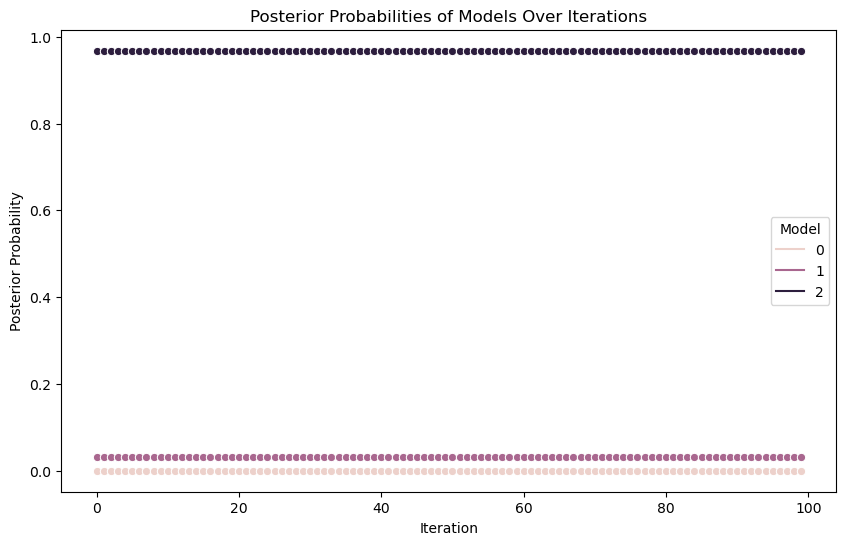

In [5]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Define the likelihood function for each model
def likelihood(X, model_index):
    # Example: simple Gaussian likelihood for each model
    mean = model_index  # Placeholder for the mean of the model
    variance = 1  # Assume variance is 1 for simplicity
    log_likelihood = 0
    
    # Summing up the log likelihood for each data point
    for x in X:
        log_likelihood += -0.5 * ((x - mean) ** 2) / variance
    return log_likelihood

# Define the prior probability for each model (uniform in this example)
def prior_model(model_index, num_models):
    return 1 / num_models

# Define the function to calculate L_m for each model
def calculate_Lm(X, model_index, q_Z_m):
    # Calculate the likelihood for this model
    likelihood_val = likelihood(X, model_index)
    # Placeholder for q(Z|m), assume it's just q_Z_m[model_index] for simplicity
    return likelihood_val + q_Z_m[model_index]  # Simplified for this example

# Define the function to update q(Z|m)
def update_q_Z_m(X, model_index):
    # Here we should optimize q(Z|m), but for simplicity, we'll return a constant
    # value. You can replace this with actual variational optimization.
    return 0.5  # Placeholder

# Initialize parameters
num_models = 3  # Number of candidate models
X = [2.3, 1.9, 2.5, 2.7]  # Example observed data (replace with your data)

# Initialize q(Z|m) and q(m)
q_Z_m = {i: 1.0 for i in range(num_models)}  # Initialize with arbitrary value
q_m = {i: prior_model(i, num_models) for i in range(num_models)}  # Uniform prior for models

# Store the posterior probabilities at each iteration for plotting
posterior_probabilities = []

# Iterative variational inference process
iterations = 100  # Number of iterations to perform
for _ in range(iterations):
    # Step 1: Update q(Z|m) for each model
    for m in range(num_models):
        q_Z_m[m] = update_q_Z_m(X, m)  # Placeholder update rule

    # Step 2: Calculate L_m for each model and update q(m)
    L_m_values = {}
    for m in range(num_models):
        L_m_values[m] = calculate_Lm(X, m, q_Z_m)

    # Step 3: Update q(m) using the formula: q(m) ∝ p(m) * exp(L_m)
    for m in range(num_models):
        q_m[m] = prior_model(m, num_models) * math.exp(L_m_values[m])  # e^L_m

    # Step 4: Normalize q(m) so that it sums to 1
    total_prob = sum(q_m.values())
    for m in range(num_models):
        q_m[m] /= total_prob  # Normalize the distribution

    # Store the posterior probabilities after each iteration for plotting
    posterior_probabilities.append(q_m.copy())

# Convert posterior probabilities into a format that Seaborn can work with
import pandas as pd

# Create a DataFrame for plotting
df = pd.DataFrame(posterior_probabilities)

# Melt the DataFrame to long format for Seaborn
df_melted = df.reset_index().melt(id_vars=['index'], value_vars=df.columns)
df_melted.columns = ['Iteration', 'Model', 'Posterior Probability']

# Plot the posterior probabilities using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Iteration', y='Posterior Probability', hue='Model', data=df_melted, marker='o')

# Customize the plot
plt.title('Posterior Probabilities of Models Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Posterior Probability')
plt.legend(title='Model')

# Show the plot
plt.show()
